### 测试封装好的函数， 函数在utils文件夹下

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from tqdm import tqdm
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
from joblib import dump, load
import librosa.display  

from utils import data_process, visualize

In [2]:
#True  01227587577.csv  01231316389.csv
# EQ_Place/dataset/EQ_20210828_070322/01231316389.csv

In [2]:
path='/home/yuanshao/EQ_Place/dataset/EQ_20210828_070322/'
f='01227587577.csv'
df=pd.read_csv(path+f)
df=np.array(df)[:,:3]
ex,ey,ez=df[:,0],df[:,1],df[:,2]

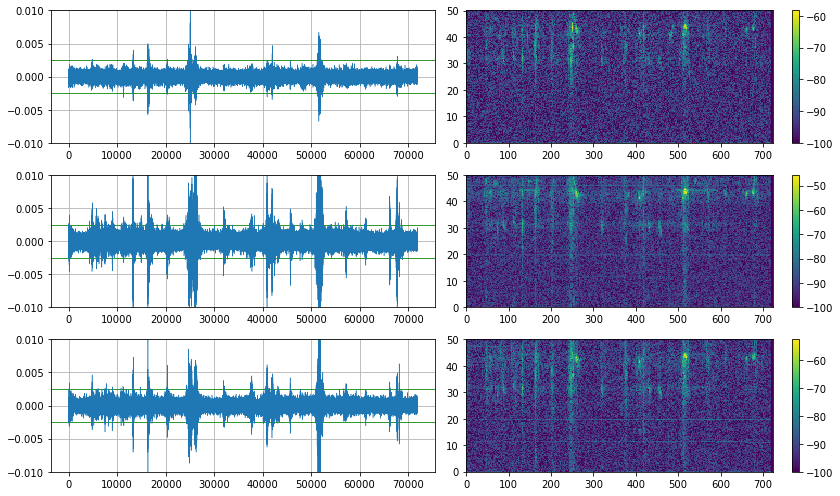

In [10]:
visualize.draw_picture([ex,ey,ez], show=True, save_path=None, save=False)

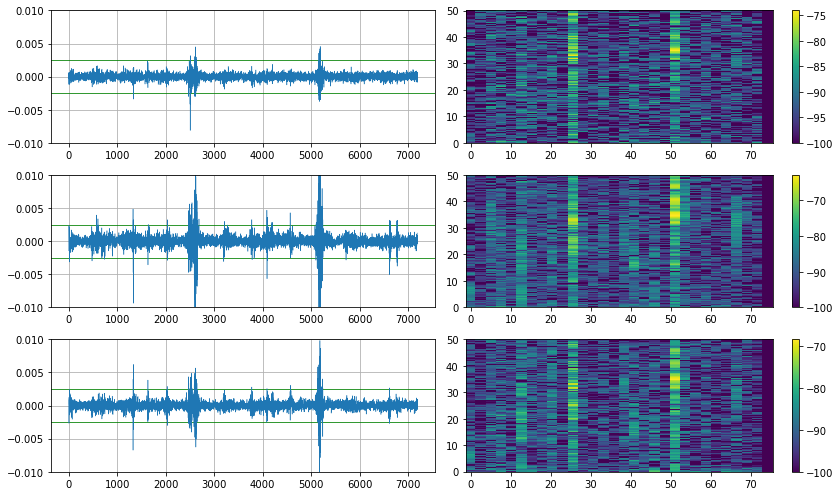

In [11]:
# 重新采样
r_ex=data_process.data_resample(ex, 7200)
r_ey=data_process.data_resample(ey, 7200)
r_ez=data_process.data_resample(ez, 7200)

visualize.draw_picture([r_ex,r_ey,r_ez], show=True, save_path=None, save=False)

In [6]:
# 计算过零率 zero crossing rate
zcr_x = data_process.ZCR(ex)
# plt.plot(np.arange(0,360,1),zcr_x)
# 计算IQR
iqr_x = data_process.cal_IQR(ex)

In [7]:
# 计算cumulative absolute velocity
cav=data_process.CAV([ex,ey,ez])
cav.shape

(360,)